In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

In [2]:
df = pd.read_csv('nike_products_with_features.csv')

In [3]:
df.to_csv('Unclean_data.csv', index=False)

In [4]:
df.head()

,Title,Subtitle,Price,Initial Price,Discount (%),Color,Color Description,Badge,Discount Amount,Discount Flag,...,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow,Dominant Color,Title Word Count,Subtitle Word Count,Marketing Appeal Score,Sale Quantity
0,Nike C1TY,Shoes,100.0,100,0,Pink,Red Stardust/Canyon Rust/Burgundy Crush/Black,Just In,0.0,0,...,True,False,False,False,False,Red Stardust,2,1,8,69
1,Nike C1TY,Shoes,100.0,100,0,Grey,Smoke Grey/Medium Ash/Aquarius Blue/Summit White,Just In,0.0,0,...,False,False,False,False,False,Smoke Grey,2,1,9,810
2,Nike C1TY,Men's Shoes,100.0,100,0,Orange,Safety Orange/Cosmic Clay/Black/Summit White,Just In,0.0,0,...,False,False,False,False,False,Safety Orange,2,2,10,421
3,Nike C1TY,Shoes,100.0,100,0,Brown,Desert Khaki/Parachute Beige/University Gold/B...,Just In,0.0,0,...,False,False,False,False,False,Desert Khaki,2,1,9,61
4,Nike C1TY,Shoes,100.0,100,0,Brown,Soft Pearl/Light Khaki/Lightning/Black,NaN,0.0,0,...,False,False,False,False,False,Soft Pearl,2,1,4,995


In [5]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features = numerical_features.drop(columns=['Price', 'Initial Price', 'Discount (%)'], errors='ignore')
numerical_features.head()

,Discount Amount,Discount Flag,Price Category,Color Diversity Score,Is Just In,Is Best Seller,Is Coming Soon,Is Member Product,Is Sustainable Materials,Is Launching in SNKRS,Is Sold Out,Is Available in SNKRS,Is Customize,Title Word Count,Subtitle Word Count,Marketing Appeal Score,Sale Quantity
0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,8,69
1,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,9,810
2,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,2,10,421
3,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,9,61
4,0.0,0,1,4,0,0,0,0,0,0,0,0,0,2,1,4,995


In [6]:
numerical_features.to_csv('Clean_data.csv')

In [7]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_features)

normalized_data

array([[-0.63127664, -0.73490108, -0.77071416, ..., -1.53849538,
         0.51716475, -1.78973367],
       [-0.63127664, -0.73490108, -0.77071416, ..., -1.53849538,
         0.9363746 ,  0.89762398],
       [-0.63127664, -0.73490108, -0.77071416, ..., -0.71465984,
         1.35558444, -0.51314812],
       ...,
       [-0.63127664, -0.73490108, -2.31957519, ..., -0.71465984,
         1.35558444, -0.19762839],
       [-0.63127664, -0.73490108, -2.31957519, ..., -0.71465984,
         0.0979549 ,  1.20589038],
       [-0.63127664, -0.73490108, -2.31957519, ..., -0.71465984,
        -0.74046479,  1.22765036]])

In [8]:
pca_2d = PCA(n_components=2)

pca_2d_result = pca_2d.fit_transform(normalized_data)
pd.DataFrame(pca_2d_result)


,0,1
0,0.508117,-1.675496
1,-0.731821,-2.547622
2,-0.243213,-2.091994
3,0.456421,-1.809470
4,-0.420094,-1.663656
...,...,...
2704,-0.638125,-0.967197
2705,0.113140,0.493772
2706,-0.202128,-0.900069
2707,-0.692662,-0.516099


C:\Users\khole\AppData\Local\Temp\ipykernel_18844\262841151.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


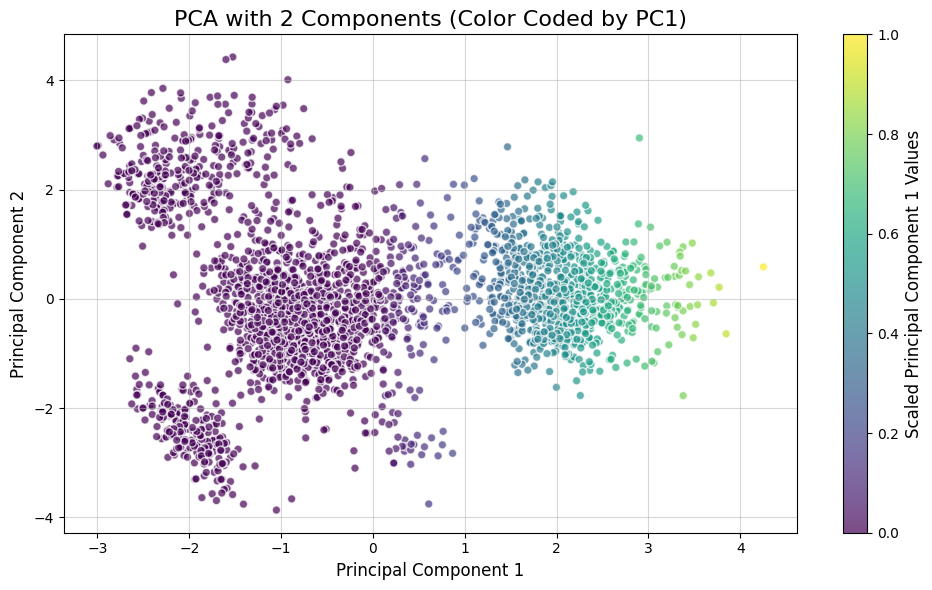

In [9]:
plt.figure(figsize=(10, 6))
cmap = cm.get_cmap('viridis')
colors_2d = cmap(pca_2d_result[:, 0] / max(pca_2d_result[:, 0]))

plt.scatter(
    pca_2d_result[:, 0], 
    pca_2d_result[:, 1], 
    c=colors_2d, 
    alpha=0.7, 
    edgecolor='w'
)

cbar = plt.colorbar()
cbar.set_label('Scaled Principal Component 1 Values', fontsize=12)

plt.title('PCA with 2 Components (Color Coded by PC1)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(normalized_data)
pd.DataFrame(pca_3d_result)

,0,1,2
0,0.501897,-1.690184,-2.929518
1,-0.736203,-2.556884,-2.587893
2,-0.250119,-2.102617,-2.407042
3,0.450072,-1.826469,-2.800291
4,-0.414875,-1.670639,-1.646667
...,...,...,...
2704,-0.637170,-0.960422,-1.434026
2705,0.114556,0.514847,-2.123142
2706,-0.202325,-0.901429,-1.271989
2707,-0.690986,-0.503019,-1.379177


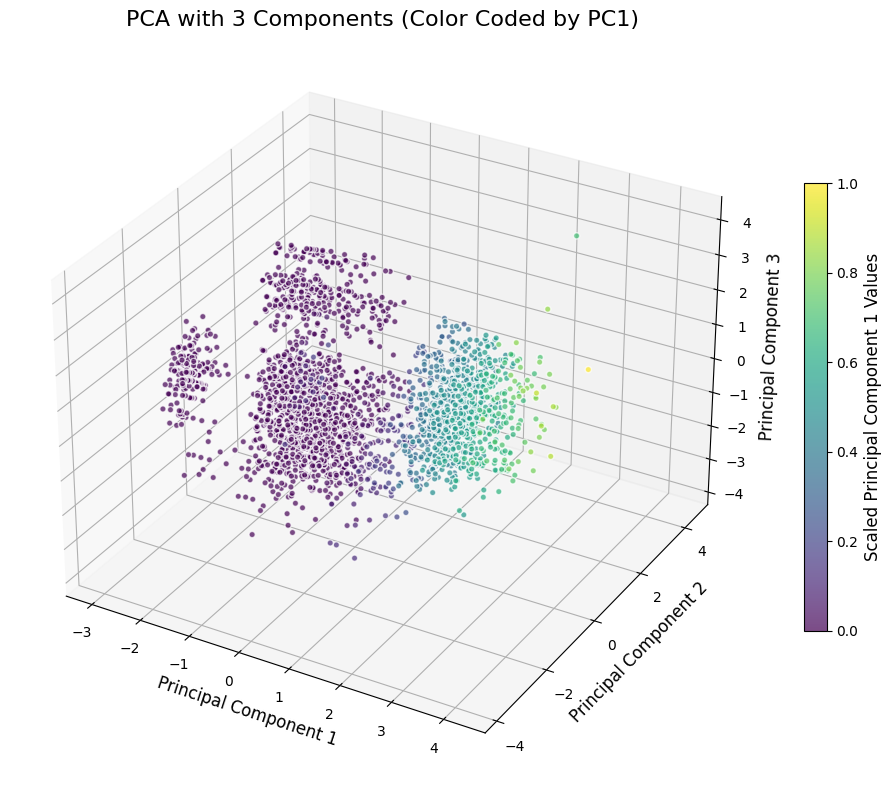

In [11]:
colors = cmap(pca_3d_result[:, 0] / max(pca_3d_result[:, 0]))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    pca_3d_result[:, 0], 
    pca_3d_result[:, 1], 
    pca_3d_result[:, 2], 
    c=colors, 
    alpha=0.7, 
    edgecolor='w'
)

cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label('Scaled Principal Component 1 Values', fontsize=12)

ax.set_title('PCA with 3 Components (Color Coded by PC1)', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
explained_variance_2d = sum(pca_2d.explained_variance_ratio_) * 100
explained_variance_3d = sum(pca_3d.explained_variance_ratio_) * 100

In [13]:
explained_variance_2d, explained_variance_3d

(26.691723811284916, 34.815096755944595)

In [14]:
pca_full = PCA()
pca_full_result = pca_full.fit_transform(normalized_data)
pd.DataFrame(pca_full_result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.504549,-1.687715,-2.966022,2.612328,-1.203493,-1.960882,0.090767,0.359651,-0.500270,-0.163534,1.860279,1.172883,-0.431845,-0.824154,1.522970,-0.355445,0.273345
1,-0.733610,-2.553534,-2.612455,2.195944,-1.034990,-2.088977,0.039196,0.331691,-0.383519,-0.105286,1.925353,0.564451,-0.171527,-0.678860,0.371518,1.342560,-0.007598
2,-0.246882,-2.100041,-2.438878,1.965405,-1.440983,-2.007967,0.085629,0.346821,-0.535025,-0.045761,2.401034,1.124905,-0.727732,-0.457042,0.835990,0.356104,0.167981
3,0.452584,-1.824104,-2.836213,2.531169,-1.124318,-1.964075,0.096817,0.362516,-0.501575,-0.171127,2.154067,1.210898,-0.581026,-0.920577,1.511701,-0.432670,0.280839
4,-0.421583,-1.669865,-1.610087,0.660196,0.292639,-0.118180,-0.019599,-0.076673,0.279392,-0.001130,-1.945914,-0.487607,-0.595288,-0.535579,-0.389164,1.241489,-0.042439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,-0.638949,-0.960472,-1.416969,-0.469107,1.729527,-0.472823,-0.110251,-0.082585,0.519173,-0.193749,0.015618,-0.055071,-0.867928,0.629366,-0.448521,0.655524,0.358091
2705,0.114355,0.514623,-2.119164,0.248788,1.406153,-0.426331,-0.185508,-0.081312,0.519033,-0.280322,-1.397196,-0.419666,0.065242,1.376472,0.064534,0.204275,0.466734
2706,-0.204420,-0.902132,-1.258924,-0.479253,1.847327,-0.422511,-0.071993,-0.062862,0.462972,-0.238823,0.707017,0.314407,-1.352179,0.326796,0.046513,-0.304772,0.504012
2707,-0.691848,-0.503307,-1.367054,-0.311417,1.843174,-0.499827,-0.181795,-0.081186,0.566885,-0.287960,-0.033602,-0.527353,-0.492043,1.005695,-0.516997,0.635846,0.371346


In [15]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
components_needed_95 = np.argmax(cumulative_variance >= 0.95) + 1
components_needed_95

15

In [16]:
eigenvalues = pca_full.explained_variance_
top_three_eigenvalues = eigenvalues[:3]
top_three_eigenvalues

array([2.6978528 , 1.84154155, 1.38162538])

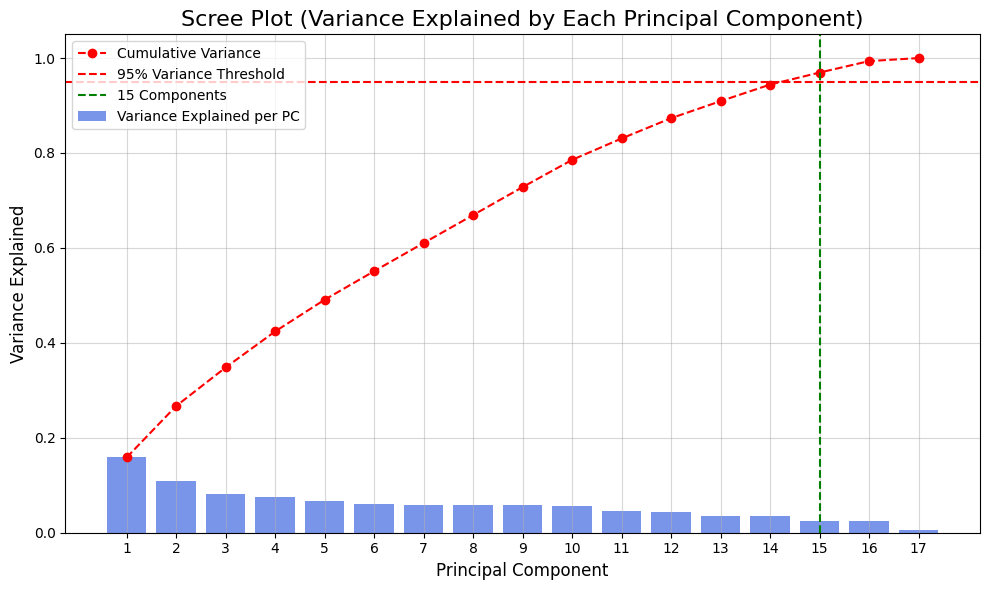

In [17]:
# Scree Plot - Corrected Version (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar(
    range(1, len(pca_full.explained_variance_ratio_) + 1), 
    pca_full.explained_variance_ratio_, 
    alpha=0.7, 
    color='royalblue', 
    label='Variance Explained per PC'
)

# Cumulative Variance Line
plt.plot(
    range(1, len(cumulative_variance) + 1), 
    cumulative_variance, 
    marker='o', 
    linestyle='--', 
    color='red', 
    label='Cumulative Variance'
)

# Mark the 95% variance threshold
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=components_needed_95, color='g', linestyle='--', label=f'{components_needed_95} Components')

# Labels and legend
plt.title('Scree Plot (Variance Explained by Each Principal Component)', fontsize=16)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


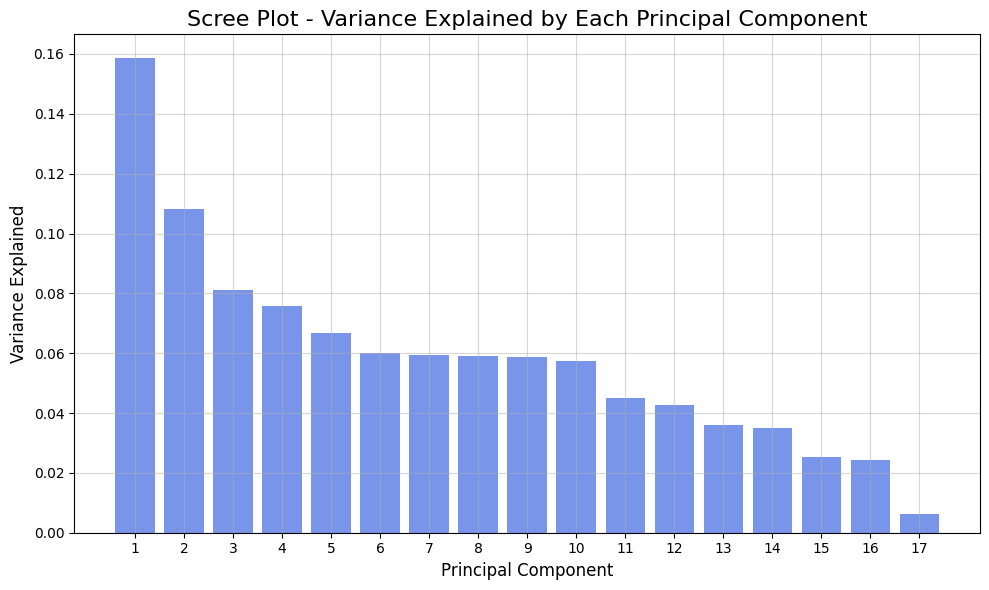

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(
    range(1, len(pca_full.explained_variance_ratio_) + 1),
    pca_full.explained_variance_ratio_,
    color='royalblue',
    alpha=0.7
)

# Labels and title
plt.title('Scree Plot - Variance Explained by Each Principal Component', fontsize=16)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
plt.grid(alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()